In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# df = pd.read_csv("../results/rssi_n10_10d_adr.csv")
# df = pd.read_csv("../results/rssi_n10_10d_noadr.csv")
df = pd.read_csv("../results/rssi_n10_10d_noadr_location_generated.csv")
df

,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656)",Unnamed: 1,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).1",Unnamed: 3,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).2",Unnamed: 5,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).3",Unnamed: 7,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).4",Unnamed: 9,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).5",Unnamed: 11,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).6",Unnamed: 13,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).7",Unnamed: 15,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).8",Unnamed: 17,"Vector of RSSI per node LoRaNetworkTest.networkServer.app[0] ($0=""avg"", #0 - General-0-20230421-16:55:12-47656).9",Unnamed: 19
0,60.106803,-125.310418,320.078274,-112.851991,354.881270,-113.813472,486.850297,-114.849887,577.241328,-122.223014,651.168482,-121.416636,1570.618251,-115.900370,2225.246556,-113.133065,3316.634411,-115.014185,3985.537923,-114.715407
1,61.306803,-125.310418,321.278274,-112.851991,356.081270,-113.813472,488.050297,-114.849887,578.441328,-122.223014,652.368482,-121.416636,1571.818251,-115.900370,2226.446556,-113.133065,3317.834411,-115.014185,3986.737923,-114.715407
2,1733.518003,-115.619929,1935.280347,-114.157951,600.129761,-118.009442,722.351814,-117.067227,1038.455286,-115.554632,3192.672988,-124.857603,5709.628009,-125.099310,6866.099082,-112.158227,4718.510111,-121.365165,5242.631407,-109.896935
3,1916.056605,-120.045176,2358.937451,-116.656237,932.540004,-107.067269,1184.082712,-113.938308,2116.290170,-112.577559,7348.644086,-118.565571,6427.993845,-125.141162,9249.167355,-113.363433,4923.362378,-114.546955,6338.823968,-114.370390
4,3852.633840,-118.533418,4419.758692,-111.986265,2072.147968,-110.016152,3291.530317,-120.124630,2686.187738,-117.770447,8086.780828,-117.411829,7019.296633,-116.340835,9589.645544,-108.363704,5643.007275,-116.760795,9629.472796,-120.979431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857086.233825,-121.998410,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858235.476464,-119.012907,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,860048.500598,-121.432720,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,862681.729646,-121.399952,NaN,NaN


In [232]:
# rssi_n10_10d_noadr_location_generated.csv
locations = [[432.51, 481.56], [545.87, 435.16], [476.36, 518.18], [484.83, 468.03], [547.28, 418.85], [442.3, 494.69], [528.67, 541.73], [551.7, 515.53], [425.33, 580.96], [501.35, 589.68]]
distances = [69.96380278401111, 79.42469704065604, 29.82217295905846, 35.386576551003095, 93.9186930275331, 57.9438184796273, 50.62965336638203, 53.982135007796835, 110.1368716643069, 89.6901605528722]
initial_node_order = ['node0', 'node1', 'node2', 'node3', 'node4', 'node5', 'node6', 'node7', 'node8', 'node9']
conditions = pd.DataFrame(distances, index=initial_node_order)
conditions

,0
node0,69.963803
node1,79.424697
node2,29.822173
node3,35.386577
node4,93.918693
node5,57.943818
node6,50.629653
node7,53.982135
node8,110.136872
node9,89.690161


In [233]:
df_count = pd.read_csv("../results/count_n10_10d_noadr_location_generated.csv")
df_count

,run,repetition,module,name,value
0,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 0,765
1,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 1,738
2,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 2,737
3,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 3,713
4,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 4,730
5,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 5,782
6,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 6,752
7,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 7,692
8,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 8,712
9,General-0-20230421-16:55:12-47656,0,LoRaNetworkTest.networkServer.app[0],numReceivedFromNode 9,734


In [234]:
node_order = []
for i in ["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]:
    node_num = df_count.loc[df_count["value"] == df[i].count()-1].index[0]
    node_order.append("node"+str(node_num))
print(node_order)

['node4', 'node6', 'node2', 'node0', 'node1', 'node8', 'node9', 'node3', 'node5', 'node7']


In [235]:
rssi_values = df[["Unnamed: 1", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13", "Unnamed: 15", "Unnamed: 17", "Unnamed: 19"]]
rssi_values.set_axis(node_order, axis='columns', inplace=True)
print(rssi_values.head())

        node4       node6       node2       node0       node1       node8  \
0 -125.310418 -112.851991 -113.813472 -114.849887 -122.223014 -121.416636   
1 -125.310418 -112.851991 -113.813472 -114.849887 -122.223014 -121.416636   
2 -115.619929 -114.157951 -118.009442 -117.067227 -115.554632 -124.857603   
3 -120.045176 -116.656237 -107.067269 -113.938308 -112.577559 -118.565571   
4 -118.533418 -111.986265 -110.016152 -120.124630 -117.770447 -117.411829   

        node9       node3       node5       node7  
0 -115.900370 -113.133065 -115.014185 -114.715407  
1 -115.900370 -113.133065 -115.014185 -114.715407  
2 -125.099310 -112.158227 -121.365165 -109.896935  
3 -125.141162 -113.363433 -114.546955 -114.370390  
4 -116.340835 -108.363704 -116.760795 -120.979431  


<AxesSubplot:>

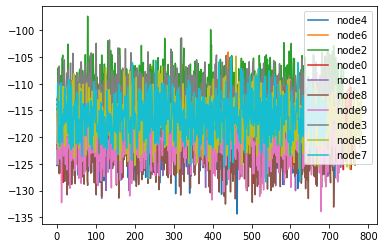

In [237]:
rssi_values.plot.line()

<AxesSubplot:ylabel='Frequency'>

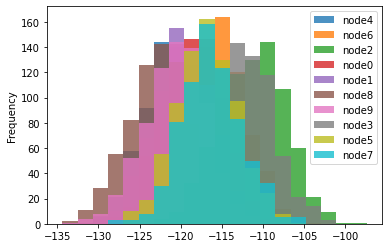

In [238]:
rssi_values.plot.hist(bins=20, alpha=0.8)

<AxesSubplot:>

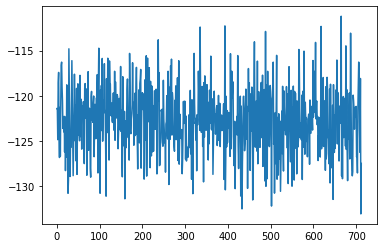

In [239]:
rssi_values["node8"].plot.line()

<AxesSubplot:ylabel='Frequency'>

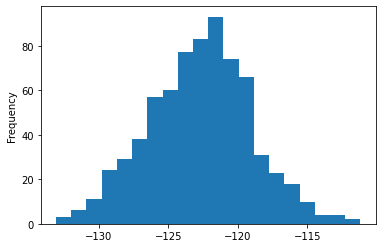

In [240]:
rssi_values["node8"].plot.hist(bins=20)

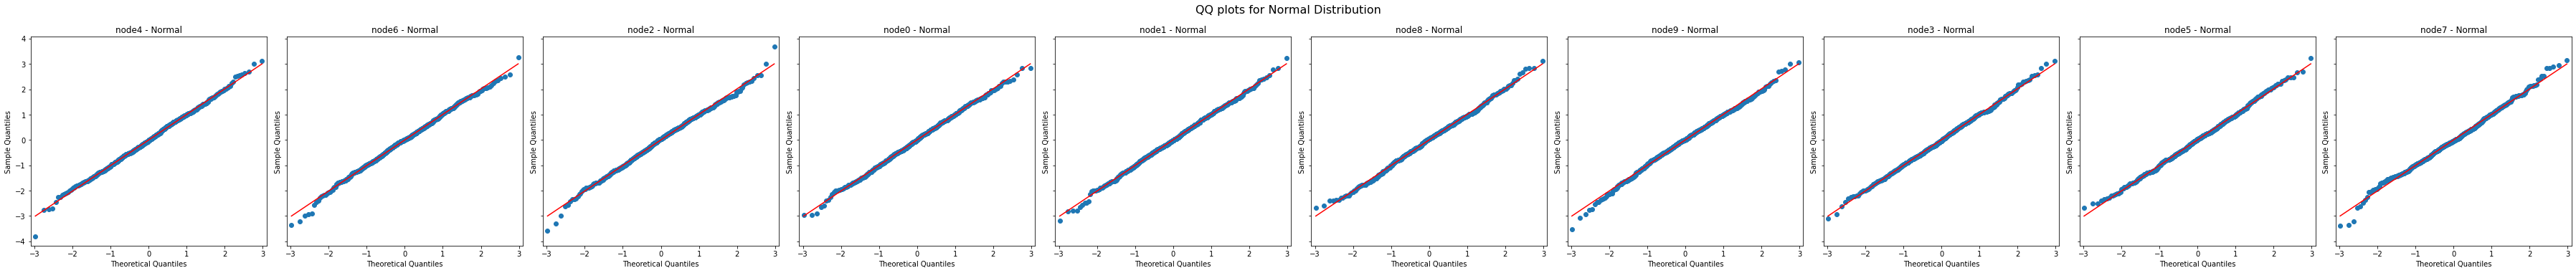

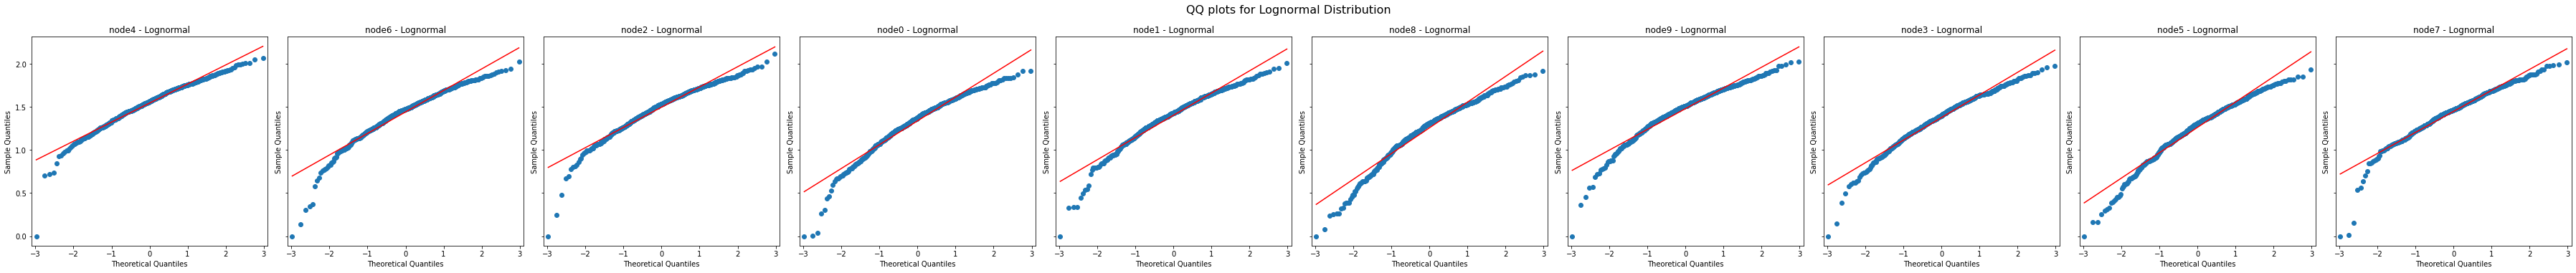

In [241]:
def plot_qq_statsmodels_horizontal(data, distribution_type):
    fig, ax = plt.subplots(1, len(data.columns), figsize=(5 * len(data.columns), 5), sharey=True)
    for idx, column in enumerate(data.columns):
        if distribution_type == "normal":
            sm.qqplot(data[column], line="r", ax=ax[idx])
        elif distribution_type == "lognormal":
            sm.qqplot(np.log(data[column] - data[column].min() + 1), line="r", ax=ax[idx])
        ax[idx].set_title(f"{column} - {distribution_type.capitalize()}")

    plt.tight_layout()
    plt.suptitle(f"QQ plots for {distribution_type.capitalize()} Distribution", fontsize=16, y=1.05)
    plt.show()


cleaned_rssi_values = rssi_values.dropna()
scaler = StandardScaler()
normalized_rssi_values = pd.DataFrame(scaler.fit_transform(cleaned_rssi_values), columns=cleaned_rssi_values.columns)


plot_qq_statsmodels_horizontal(normalized_rssi_values, "normal")
plot_qq_statsmodels_horizontal(normalized_rssi_values, "lognormal")


- norm dist because there is no multipath  
- the reason left end is above the line is that we cannot detect signal below -130dBm  

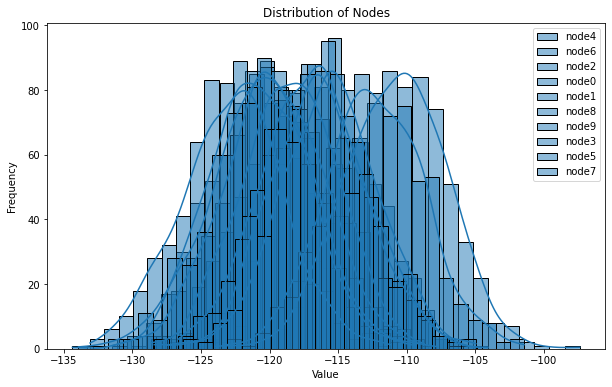

In [242]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create histograms or KDE plots for each node
for column in rssi_values.columns:
    sns.histplot(rssi_values[column], kde=True, ax=ax, label=column)

# Customize the plot
ax.set_title("Distribution of Nodes")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.legend()

# Display the plot
plt.show()

<AxesSubplot:>

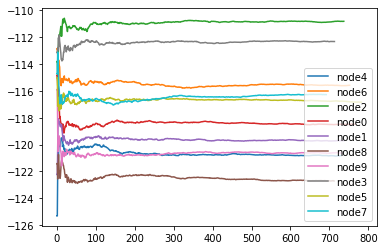

In [243]:
# Calculate the cumulative sum for each column
cumulative_sum = rssi_values.cumsum()

# Calculate the cumulative count for each column
cumulative_count = rssi_values.apply(lambda x: (x.notna().cumsum()))

# Compute the average value for each element by dividing cumulative sum by cumulative count
average_df = cumulative_sum / cumulative_count

# Display the new DataFrame with the average values
average_df.plot.line()

         distance        rssi
node0   69.963803 -118.486743
node1   79.424697 -119.700591
node2   29.822173 -110.809385
node3   35.386577 -112.316287
node4   93.918693 -120.819581
node5   57.943818 -116.837140
node6   50.629653 -115.576561
node7   53.982135 -116.270802
node8  110.136872 -122.708378
node9   89.690161 -120.609656


<AxesSubplot:xlabel='distance', ylabel='rssi'>

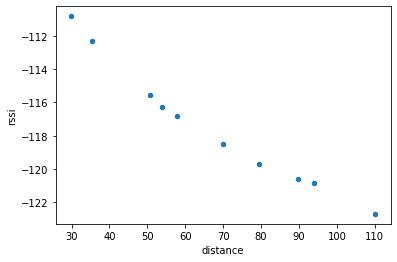

In [244]:
mean_rssi = pd.DataFrame(rssi_values.mean())
rssi_distance = pd.merge(conditions, mean_rssi, left_index=True, right_index=True)
rssi_distance.columns = ["distance", "rssi"]
print(rssi_distance)
rssi_distance.plot.scatter(x="distance",y="rssi")

{'node0': 69.96380278401111, 'node1': 79.42469704065604, 'node2': 29.82217295905846, 'node3': 35.386576551003095, 'node4': 93.9186930275331, 'node5': 57.9438184796273, 'node6': 50.62965336638203, 'node7': 53.982135007796835, 'node8': 110.1368716643069, 'node9': 89.6901605528722}
node4
node6
node2
node0
node1
node8
node9
node3
node5
node7


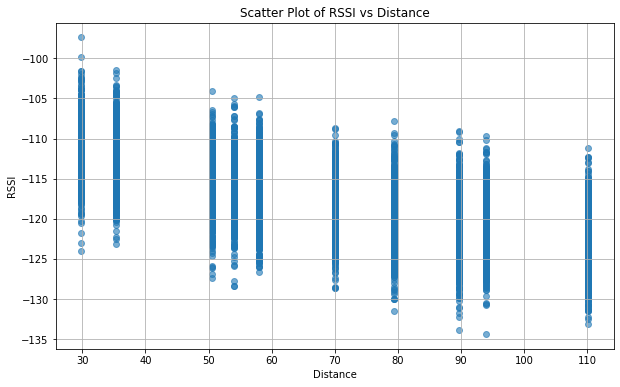

In [245]:
# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()
print(node_to_distance)

# Create an empty array to store x (distance) and y (rssi) values for the scatter plot
x_values = []
y_values = []

# Iterate through the columns (nodes) in rssi_values
for node in rssi_values.columns:
    # Get the distance for the current node
    print(node)
    distance = node_to_distance[node]
    
    # Get the rssi values for the current node
    rssi_values_node = rssi_values[node].dropna()
    
    # Append the distance value to x_values as many times as there are rssi values
    x_values.extend([distance] * len(rssi_values_node))
    
    # Append the rssi values to y_values
    y_values.extend(rssi_values_node)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.6)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Scatter Plot of RSSI vs Distance")

# Optionally, you can add a grid for better readability
plt.grid(True)

# Finally, display the plot
plt.show()



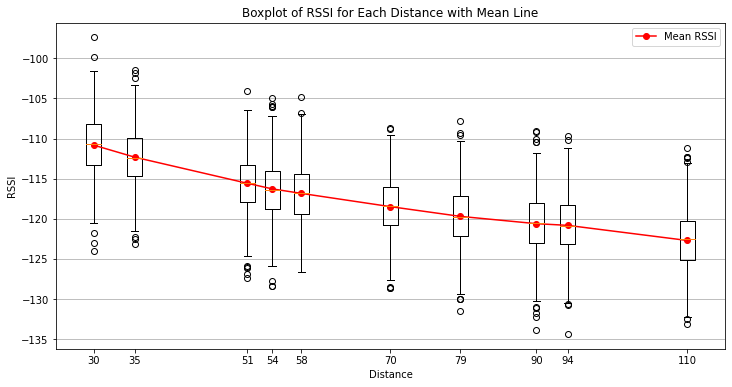

In [246]:
# Create a list of node names
node_names = rssi_values.columns

# Create a mapping from node names to their corresponding distance
node_to_distance = conditions.squeeze().to_dict()

# Create a list of distances corresponding to the node names
distances_list = [node_to_distance[node] for node in node_names]

# Initialize an empty list to store the data for box plots
box_plot_data = []

# Add the RSSI values for each node to the box_plot_data list
for node in node_names:
    box_plot_data.append(rssi_values[node].dropna().tolist())

# Create custom ticks and labels for the x-axis
xticks = distances_list
xticklabels = [int(round(dist)) for dist in xticks]

# Calculate the mean RSSI for each node
mean_rssi_values = [np.mean(rssi) for rssi in box_plot_data]

# Sort the data by distances
sorted_data = sorted(zip(distances_list, box_plot_data, mean_rssi_values))
sorted_distances, sorted_box_plot_data, sorted_mean_rssi_values = zip(*sorted_data)

# Create a box plot for each node with distance on the x-axis
plt.figure(figsize=(12, 6))
plt.boxplot(sorted_box_plot_data, positions=sorted_distances, widths=2)

# Set custom ticks and labels for the x-axis
sorted_xticks = sorted(xticks)
sorted_xticklabels = [str(int(round(d))) for d in sorted_xticks]
plt.xticks(sorted_xticks, sorted_xticklabels)

# Add labels and title
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Boxplot of RSSI for Each Distance with Mean Line")

# Optionally, you can add a grid for better readability
plt.grid(axis='y')

# Plot a line connecting the mean RSSI values for each node
plt.plot(sorted_distances, sorted_mean_rssi_values, marker='o', linestyle='-', color='red', label='Mean RSSI')

# Add a legend to the plot
plt.legend()

# Finally, display the plot
plt.show()




# prediction